<a href="https://colab.research.google.com/github/JoaoDiamantino/data_wrangling/blob/main/FuncionariosDesligados_dwCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se você fosse gerente em uma empresa, o que você faria
de diferente caso descobrisse que alguns de seus
funcionários estão pensando em sair? Daria um aumento,
buscaria contratar outro ou tentaria ver como melhorar?
De toda forma, ter essa informação seria útil e evitaria
muitos problemas!

In [204]:
from google.colab import drive

## 1) Bibliotecas

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Carregando Dados

In [206]:
df_churn = pd.read_csv('https://github.com/JoaoDiamantino/data_wrangling/raw/main/churn.csv')
df_interactions = pd.read_csv('https://github.com/JoaoDiamantino/data_wrangling/raw/main/commentInteractions.csv')
df_anonimized = pd.read_csv('https://github.com/JoaoDiamantino/data_wrangling/raw/main/comments_clean_anonimized.csv')
df_votes = pd.read_csv('https://github.com/JoaoDiamantino/data_wrangling/raw/main/votes.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.



## 3) Analisando Dados

### 3.1) Entendendo as Bases

#### 3.1.1) Churn



*   employee : Identificação do empregado (Única para cada empresa)
*   companyAlias: Identificação da empresa
*   numVotes : Quantidade de votos do empregado
*   lastParticipationDate: Data da última participação
*   stillExists: Status do funcionário (false = Saiu da empresa)







In [207]:
df_churn.head()

employee              companyAlias  numVotes         lastParticipationDate  \
0       512  56aec740f1ef260003e307d6         4  Thu Feb 23 12:48:04 CET 2017   
1        -2  56aec740f1ef260003e307d6         0  Wed Jan 18 14:00:55 CET 2017   
2         2  56aec740f1ef260003e307d6        72  Fri Mar 17 01:00:00 CET 2017   
3       487  56aec740f1ef260003e307d6        14  Sat Nov 19 15:02:14 CET 2016   
4         3  56aec740f1ef260003e307d6        22  Thu Feb 16 01:00:00 CET 2017   

   stillExists  
0         True  
1        False  
2         True  
3        False  
4         True

In [208]:
df_churn.shape

(4847, 5)

#### 3.1.2) Interactions



*   employee: ID do funcionário que interagiu com o comentário realizado.
*   companyAlias: Identificação da empresado funcionário acima.
*   liked e disliked: Tipo de interação (True indica a interação).
*   commentId: Identificação do comentário.



In [209]:
df_interactions.head()

employee              companyAlias liked disliked                 commentId
0       307  56aec740f1ef260003e307d6  True    False  58d018d7e010990004e38070
1        36  56aec740f1ef260003e307d6  True    False  58d018d7e010990004e38070
2       276  56aec740f1ef260003e307d6  True    False  58d018d7e010990004e38070
3        24  56aec740f1ef260003e307d6  True    False  58d018d7e010990004e38070
4       382  56aec740f1ef260003e307d6  True    False  58d0179ae010990004e3806d

In [210]:
df_interactions.shape

(336960, 5)

#### 3.1.3) Anonimized

*   employee : Identificação do funcionário que fez o comentário.
*   companyAlias: Identificação da empresado funcionário acima.
*   commentId: Identificação do comentário:
*   txt: Comentário
*   likes e dislikes: Quantidades de Curtidas e Não Curtidas do Comentário
*   commentDate: Data do comentário.


In [211]:
df_anonimized.head()

employee              companyAlias                 commentId  \
0       307  56aec740f1ef260003e307d6  58d018d7e010990004e38070   
1       382  56aec740f1ef260003e307d6  58d0179ae010990004e3806d   
2       172  56aec740f1ef260003e307d6  58cff8cde010990004e37f6a   
3       135  56aec740f1ef260003e307d6  58cfefeee010990004e37f60   
4       225  56aec740f1ef260003e307d6  58cfd9b4e010990004e37f52   

                                                 txt  likes  dislikes  \
0  **********************************************...    4.0       0.0   
1                      *****************************    1.0       2.0   
2                        ***************************    3.0       0.0   
3                        ***************************    1.0       1.0   
4                  *********************************    3.0       2.0   

                    commentDate  
0  Mon Mar 20 19:00:17 CET 2017  
1  Mon Mar 20 18:55:16 CET 2017  
2  Mon Mar 20 16:44:02 CET 2017  
3  Mon Mar 20 16:06:08 CET 2017  
4  Mon Mar 20 14:30:50 CET 2017

In [212]:
df_anonimized.shape

(82756, 7)

#### 3.1.4) Votes



*   employee: ID do funcionário que votou.
*   companyAlias: ID da empresa do funcionário acima.
*   voteDate: Data do voto.
*   vote: Valor do Voto.



In [213]:
df_votes.head()

employee              companyAlias                      voteDate  vote
0        31  56aec740f1ef260003e307d6  Mon Feb 01 01:00:00 CET 2016     4
1        33  56aec740f1ef260003e307d6  Mon Feb 01 01:00:00 CET 2016     4
2        79  56aec740f1ef260003e307d6  Mon Feb 01 01:00:00 CET 2016     4
3        94  56aec740f1ef260003e307d6  Mon Feb 01 01:00:00 CET 2016     4
4        16  56aec740f1ef260003e307d6  Mon Feb 01 01:00:00 CET 2016     2

In [214]:
df_votes.shape

(221232, 4)

### 3.2) Definições de Problema

#### 3.2.1)Qual a variável Target?

In [215]:
# Queremos saber se o funcionário sairá.
Target1 = df_churn['stillExists']

# Queremos saber quando o funcionário sairá.
Target2 = df_churn['lastParticipationDate']

#### 3.2.2) Quais as colunas do dataset que podem ajudar a prever a
informação desejada?



*   Churn
        NumVotes

*   Interactions
        Flag de Like ou Dislike

*   Anonimized
        Likes e Dislikes
        Dias entre Churn e último comentário.

*   Votes
        Valor do Voto



#### 3.2.3) Como os 4 datasets se relacionam? Quais as chaves de cada um?




In [216]:
churnKey = ['employee','companyAlias']
interactionsKey = ['employee', 'companyAlias','commentId']
anonimizedKey = ['employee', 'companyAlias', 'commentId']
votesKey = ['employee', 'companyAlias']

A tabela de Interactions diz respeito aos funcionários que comentaram sobre determinado commentID enquanto a Tabela de Anonimized mostra o empregado que comentou.

In [217]:
df_interactions.loc[df_interactions.commentId == '58d018d7e010990004e38070',:]


employee              companyAlias liked disliked                 commentId
0       307  56aec740f1ef260003e307d6  True    False  58d018d7e010990004e38070
1        36  56aec740f1ef260003e307d6  True    False  58d018d7e010990004e38070
2       276  56aec740f1ef260003e307d6  True    False  58d018d7e010990004e38070
3        24  56aec740f1ef260003e307d6  True    False  58d018d7e010990004e38070

In [218]:
df_anonimized.loc[df_anonimized.commentId == '58d018d7e010990004e38070', :]

employee              companyAlias                 commentId  \
0          307  56aec740f1ef260003e307d6  58d018d7e010990004e38070   
5113       307  56aec740f1ef260003e307d6  58d018d7e010990004e38070   

                                                    txt  likes  dislikes  \
0     **********************************************...    4.0       0.0   
5113  **********************************************...    4.0       0.0   

                       commentDate  
0     Mon Mar 20 19:00:17 CET 2017  
5113  Mon Mar 20 19:00:17 CET 2017

Portanto, as chaves que se relacionam são companyAlias e commentId

1.   Merge na tabela Anonimized com interactions - chave commentId
2.   Item da lista



#### 3.2.4) Quais os tipos das Variáveis?

In [219]:
df_churn.dtypes

employee                  int64
companyAlias             object
numVotes                  int64
lastParticipationDate    object
stillExists                bool
dtype: object

In [220]:
df_interactions.dtypes

employee         int64
companyAlias    object
liked           object
disliked        object
commentId       object
dtype: object

In [221]:
df_anonimized.dtypes

employee          int64
companyAlias     object
commentId        object
txt              object
likes           float64
dislikes        float64
commentDate      object
dtype: object

In [222]:
df_votes.dtypes

employee         int64
companyAlias    object
voteDate        object
vote             int64
dtype: object

employee está como int, mas não tem valor númerico

*   'employee' está como int, mas não tem valor númerico.
*   'likes' e 'dislikes' precisam virar flags.
*   'commentDate' e 'voteDate' precisam ser convertido para Data



##### 3.2.4.1) Covertendo variáveis

In [223]:
# substituindo 'EET' por 'CEST' para que conversão seja possível
df_churn.lastParticipationDate = df_churn.lastParticipationDate.astype(str).map(lambda x: x.replace("CEST", "EET"))
df_votes.voteDate = df_votes.voteDate.astype(str).map(lambda x: x.replace("CEST", "EET"))
df_anonimized.commentDate = df_anonimized.commentDate.astype(str).map(lambda x: x.replace("CEST", "EET"))

In [224]:
#convertendo
df_churn.lastParticipationDate = pd.to_datetime(df_churn.lastParticipationDate, format="%a %b %d %X %Z %Y").map(lambda x: x.tz_convert(None))
df_votes.voteDate = pd.to_datetime(df_votes.voteDate, format="%a %b %d %X %Z %Y").map(lambda x: x.tz_convert(None))
df_anonimized.commentDate = pd.to_datetime(df_anonimized.commentDate, format="%a %b %d %X %Z %Y").map(lambda x: x.tz_convert(None))

In [225]:
df_churn.head(1)

employee              companyAlias  numVotes lastParticipationDate  \
0       512  56aec740f1ef260003e307d6         4   2017-02-23 11:48:04   

   stillExists  
0         True

In [226]:
# criando uma funçao para criar flags

def bool2int(df):
    bool_cols = df.select_dtypes('bool').columns
    for col in bool_cols:
        df[col] = df[col].map(lambda x: 1 if x is True else 0)
    return df

In [227]:
df_churn = bool2int(df_churn)
df_churn.head(1)

employee              companyAlias  numVotes lastParticipationDate  \
0       512  56aec740f1ef260003e307d6         4   2017-02-23 11:48:04   

   stillExists  
0            1

In [228]:
df_interactions.liked=df_interactions.liked.map(bool)
df_interactions.disliked=df_interactions.disliked.map(bool)
df_interactions = bool2int(df_interactions)
df_interactions.head()

employee              companyAlias  liked  disliked  \
0       307  56aec740f1ef260003e307d6      1         0   
1        36  56aec740f1ef260003e307d6      1         0   
2       276  56aec740f1ef260003e307d6      1         0   
3        24  56aec740f1ef260003e307d6      1         0   
4       382  56aec740f1ef260003e307d6      1         0   

                  commentId  
0  58d018d7e010990004e38070  
1  58d018d7e010990004e38070  
2  58d018d7e010990004e38070  
3  58d018d7e010990004e38070  
4  58d0179ae010990004e3806d

#### 3.2.5) Qual a faixa de valores de cada uma delas?

##### 3.2.5.1) Valores em Churn

In [229]:
df_churn.describe()

employee     numVotes  stillExists
count  4847.000000  4847.000000  4847.000000
mean    167.375490    45.896431     0.757788
std     208.271041    71.302128     0.428466
min    -218.000000     0.000000     0.000000
25%      33.000000     3.000000     1.000000
50%     113.000000    16.000000     1.000000
75%     231.000000    59.000000     1.000000
max     999.000000   740.000000     1.000000

In [230]:
# removendo os funcionários com id negativa:
df_churn = df_churn.loc[df_churn['employee']>0,:]
df_votes = df_votes.loc[df_votes.employee>=0]
df_interactions = df_interactions.loc[df_interactions.employee>=0]
df_anonimized = df_anonimized.loc[df_anonimized.employee>=0]

In [231]:
# Quantas empresas diferentes?
df_churn['companyAlias'].nunique()

37

In [232]:
import plotly.express as px
fig = px.histogram(df_churn, x="companyAlias")
fig.show()

In [233]:
df_churn.lastParticipationDate.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                    4418
unique                   1484
top       2017-03-20 00:00:00
freq                      478
first     2014-06-06 23:00:00
last      2017-03-20 20:25:54
Name: lastParticipationDate, dtype: object

In [234]:
fig = px.histogram(df_churn, 'lastParticipationDate')
fig.show()

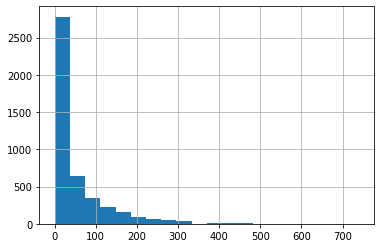

In [235]:
df_churn['numVotes'].hist(bins = 20)

##### 3.2.5.2) Valores em Votes

In [236]:
df_votes.describe()

employee           vote
count  221232.000000  221232.000000
mean      172.119562       2.861530
std       172.723491       0.986078
min         1.000000       1.000000
25%        50.000000       2.000000
50%       127.000000       3.000000
75%       222.000000       4.000000
max       999.000000       4.000000

In [237]:
df_votes.vote=df_votes.vote.map(int)

In [238]:
fig = px.histogram(df_votes, 'vote',)
fig.show()

In [239]:
fig = px.histogram(df_votes, x="voteDate")
fig.show()

##### 3.2.5.3) Valores em Anonimized

In [240]:
df_anonimized.describe()

employee         likes      dislikes
count  77329.000000  77328.000000  77328.000000
mean     149.698095      6.994090      1.289093
std      156.121014      7.764383      2.734520
min        1.000000      0.000000      0.000000
25%       38.000000      2.000000      0.000000
50%      112.000000      4.000000      0.000000
75%      206.000000      9.000000      1.000000
max      999.000000     86.000000     53.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73007c7510>]],
      dtype=object)

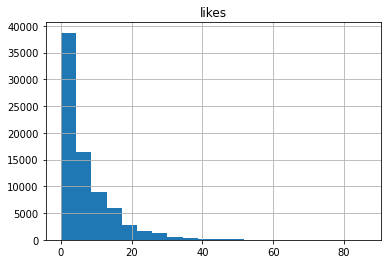

In [241]:
df_anonimized[['likes']].hist(bins=20)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72ffbfebd0>]],
      dtype=object)

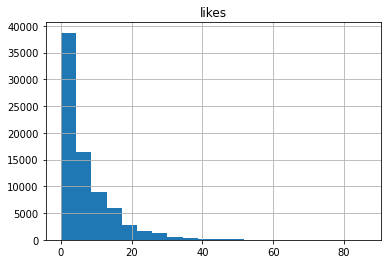

In [242]:
df_anonimized[['likes']].hist(bins=20)

In [243]:
fig = px.histogram(df_anonimized, x="commentDate")
fig.show()

#### 3.2.6) Há valores duplicados?

In [244]:
def removeDuplicates (df):
  shapeInit = df.shape
  df = df.drop_duplicates()
  shapeFinal = df.shape
  duplic = shapeInit[0] - shapeFinal[0]
  return  duplic

print(removeDuplicates(df_churn), ' linhas duplicadas ')
print(removeDuplicates(df_interactions), ' linhas duplicadas ')
print(removeDuplicates(df_anonimized), ' linhas duplicadas ')
print(removeDuplicates(df_votes), ' linhas duplicadas ')

0  linhas duplicadas 
7  linhas duplicadas 
38335  linhas duplicadas 
87  linhas duplicadas 


In [245]:
df_interactions = df_interactions.drop_duplicates()
df_interactions.shape

(324471, 5)

In [246]:
df_churn = df_churn.drop_duplicates()
df_churn.shape

(4418, 5)

In [247]:
df_anonimized = df_anonimized.drop_duplicates()
df_anonimized.shape

(38994, 7)

In [248]:
df_votes = df_votes.drop_duplicates()
df_votes.shape

(221145, 4)

## 4) Estruturando os dados

### 4.1) Unindo DataSets Churn + Votes

In [249]:
# Merge de df_churn e df_votes pelas chaves 'employee' e 'companyAlias'
# buscar apenas a coluna 'lastPaticipationDate'
churnMergedVotes = df_churn[['employee', 'companyAlias', 'lastParticipationDate']].merge(df_votes,on=['employee', 'companyAlias'],how="left")
churnMergedVotes.head()

employee              companyAlias lastParticipationDate   voteDate  vote
0       512  56aec740f1ef260003e307d6   2017-02-23 11:48:04 2017-01-17     3
1       512  56aec740f1ef260003e307d6   2017-02-23 11:48:04 2017-01-23     2
2       512  56aec740f1ef260003e307d6   2017-02-23 11:48:04 2017-02-21     1
3       512  56aec740f1ef260003e307d6   2017-02-23 11:48:04 2017-02-23     4
4         2  56aec740f1ef260003e307d6   2017-03-17 00:00:00 2016-02-05     2

### 4.2) Inserindo novas métricas Churn + Votes

In [250]:
# criar uma nova métrica de diferença entre 'lastParticipationDate' e 'voteDate'
churnMergedVotes['DateDiff'] = churnMergedVotes['lastParticipationDate'] - churnMergedVotes['voteDate']

# Modificar o tipo da nova coluna formada para contar apenas a diferença em dias
churnMergedVotes['DateDiff'] = churnMergedVotes['DateDiff'].map(lambda x: x.components.days)


churnMergedVotes.head()

employee              companyAlias lastParticipationDate   voteDate  vote  \
0       512  56aec740f1ef260003e307d6   2017-02-23 11:48:04 2017-01-17     3   
1       512  56aec740f1ef260003e307d6   2017-02-23 11:48:04 2017-01-23     2   
2       512  56aec740f1ef260003e307d6   2017-02-23 11:48:04 2017-02-21     1   
3       512  56aec740f1ef260003e307d6   2017-02-23 11:48:04 2017-02-23     4   
4         2  56aec740f1ef260003e307d6   2017-03-17 00:00:00 2016-02-05     2   

   DateDiff  
0        37  
1        31  
2         2  
3         0  
4       406

In [251]:
churnMergedVotes['DateDiff'].describe()

count    222883.000000
mean        145.036266
std         135.848875
min        -179.000000
25%          45.000000
50%         112.000000
75%         200.000000
max         770.000000
Name: DateDiff, dtype: float64

In [252]:
# removendo valores negativos pois nenhuma informação deve ter uma data posterior ao nosso target.

churnMergedVotes[churnMergedVotes['DateDiff']<=0].shape


(4548, 6)

In [253]:
churnMergedVotes = churnMergedVotes.loc[churnMergedVotes.DateDiff >0, :]
churnMergedVotes.shape

(218335, 6)

In [254]:
fig = px.histogram(churnMergedVotes,  x = 'DateDiff')
fig.show()

### 4.3) Agrupando valores novo Dataset Churn + Vote

In [255]:
#Agora vamos agrupar a nossa base por <employee, companyAlias> e derivar as seguintes métricas:
#Função para retornar a moda:
def mode(x):
    return pd.Series.mode(x)[0]

#vote: mean, mode (use a função abaixo), min, max, count
#qt_dias_diff_vote: min, max, median 
df_votes_group = churnMergedVotes.groupby(['employee', 'companyAlias'],as_index= False,).agg(
    {'vote':['mean',mode,'min','max','count'],'DateDiff': ['min','max','median']})

df_votes_group.head()
#Chame essa nova base de df_votes_group. Lembre de dar um flat no nome das colunas.

employee              companyAlias      vote                    DateDiff  \
                                          mean mode min max count      min   
0        1  5474b9cde4b0bf7614b2c66f  4.000000    4   4   4     1        1   
1        1  54d43612e4b0f6a40755d93e  3.133333    3   2   4    15       13   
2        1  54e52607e4b01191dc064966  2.984962    3   1   4   133        2   
3        1  5641f96713664c000332c8cd  3.167969    3   1   4   256        1   
4        1  56558cfd07a5de00030908fb  3.000000    3   3   3     1        4   

               
   max median  
0    1    1.0  
1  487   35.0  
2  553  230.0  
3  325  147.5  
4    4    4.0

In [256]:
#Ajustando os nomes das colunas formadas no agrupamento

df_votes_group.columns = ['_'.join(col).strip() if col[1] != "" else col[0] for col in df_votes_group.columns.values]
df_votes_group.head()

employee              companyAlias  vote_mean  vote_mode  vote_min  \
0         1  5474b9cde4b0bf7614b2c66f   4.000000          4         4   
1         1  54d43612e4b0f6a40755d93e   3.133333          3         2   
2         1  54e52607e4b01191dc064966   2.984962          3         1   
3         1  5641f96713664c000332c8cd   3.167969          3         1   
4         1  56558cfd07a5de00030908fb   3.000000          3         3   

   vote_max  vote_count  DateDiff_min  DateDiff_max  DateDiff_median  
0         4           1             1             1              1.0  
1         4          15            13           487             35.0  
2         4         133             2           553            230.0  
3         4         256             1           325            147.5  
4         3           1             4             4              4.0

### 4.4) Unindo DataSets Anonimized + Churn

In [257]:
churnMergedAnonimized = df_churn[['employee', 'companyAlias', 'lastParticipationDate']].merge(df_anonimized,on=['employee', 'companyAlias'],how="inner")
churnMergedAnonimized.head()

employee              companyAlias lastParticipationDate  \
0       512  56aec740f1ef260003e307d6   2017-02-23 11:48:04   
1       512  56aec740f1ef260003e307d6   2017-02-23 11:48:04   
2         2  56aec740f1ef260003e307d6   2017-03-17 00:00:00   
3         2  56aec740f1ef260003e307d6   2017-03-17 00:00:00   
4         2  56aec740f1ef260003e307d6   2017-03-17 00:00:00   

                  commentId  \
0  58ac23657b6f5d00046f8b0e   
1  588631dd751222000420e1e8   
2  5891fdcae17cc3000411f911   
3  5852a04bc8a2da000497c38a   
4  584facca0b45f50004cb1c02   

                                                 txt  likes  dislikes  \
0  **********************************************...    9.0       0.0   
1  **********************************************...    6.0       2.0   
2  **********************************************...   12.0       5.0   
3  **********************************************...    5.0      12.0   
4  **********************************************...    5.0       9.0   

          commentDate  
0 2017-02-21 11:23:01  
1 2017-01-23 16:39:11  
2 2017-02-01 15:23:07  
3 2016-12-15 13:52:25  
4 2016-12-13 08:09:10

### 4.5) Inserindo novas métricas Anonimized + Churn

In [258]:
#Antes de criarmos a nova métrica pela diferença entre 'lastParticipationDate' e 'commentDate'
#é preciso verificar os valores nulos de 'commentDate'
churnMergedAnonimized = churnMergedAnonimized[~ churnMergedAnonimized.commentDate.isna()]


churnMergedAnonimized['commentDateDiff'] = (churnMergedAnonimized['lastParticipationDate'] - churnMergedAnonimized['commentDate'])
churnMergedAnonimized['commentDateDiff'] = churnMergedAnonimized['commentDateDiff'].map(lambda x : x.components.days)
churnMergedAnonimized.head()

employee              companyAlias lastParticipationDate  \
0       512  56aec740f1ef260003e307d6   2017-02-23 11:48:04   
1       512  56aec740f1ef260003e307d6   2017-02-23 11:48:04   
2         2  56aec740f1ef260003e307d6   2017-03-17 00:00:00   
3         2  56aec740f1ef260003e307d6   2017-03-17 00:00:00   
4         2  56aec740f1ef260003e307d6   2017-03-17 00:00:00   

                  commentId  \
0  58ac23657b6f5d00046f8b0e   
1  588631dd751222000420e1e8   
2  5891fdcae17cc3000411f911   
3  5852a04bc8a2da000497c38a   
4  584facca0b45f50004cb1c02   

                                                 txt  likes  dislikes  \
0  **********************************************...    9.0       0.0   
1  **********************************************...    6.0       2.0   
2  **********************************************...   12.0       5.0   
3  **********************************************...    5.0      12.0   
4  **********************************************...    5.0       9.0   

          commentDate  commentDateDiff  
0 2017-02-21 11:23:01                2  
1 2017-01-23 16:39:11               30  
2 2017-02-01 15:23:07               43  
3 2016-12-15 13:52:25               91  
4 2016-12-13 08:09:10               93

In [259]:
# Removendo qualquer valor negativo de commentDateDiff pois não podemos ter nenhum valor futuro ao nosso target marcador por 'lastParticipationDate'
churnMergedAnonimized[churnMergedAnonimized['commentDateDiff']<=0].shape

(1068, 9)

In [260]:
churnMergedAnonimized = churnMergedAnonimized[churnMergedAnonimized['commentDateDiff'] > 0]
churnMergedAnonimized.shape

(38584, 9)

In [261]:
fig = px.histogram(churnMergedAnonimized, x="commentDateDiff")
fig.show()

### 4.6) Agrupando valores do novo Dataset Anonimized + Churn

In [262]:
#- likes: mean, min, max
#- dislikes: mean, min, max
#- qt_dias_diff_comment: min, max, median
#- commentId: count

df_comments_group = churnMergedAnonimized.groupby(by = ['employee','companyAlias'], as_index = False ).agg({'likes': ['mean','min', 'max'],
    'dislikes': ['mean','min', 'max'],
    'commentDateDiff': ['min', 'max', 'median'],
    'commentId': ['count']
    
})

# ajustando colunas
df_comments_group.columns = ['_'.join(col).strip() if col[1] != "" else col[0] for col in df_comments_group.columns.values]
df_comments_group.head()

employee              companyAlias  likes_mean  likes_min  likes_max  \
0         1  5641f96713664c000332c8cd    4.371859        0.0       25.0   
1         1  56558cfd07a5de00030908fb    5.000000        5.0        5.0   
2         1  56e2a905e3b6fe0003e32855    6.025000        0.0       13.0   
3         1  5742d699f839a10003a407d2    4.695652        0.0       14.0   
4         1  574c423856b6300003009953    2.763889        0.0       16.0   

   dislikes_mean  dislikes_min  dislikes_max  commentDateDiff_min  \
0       1.778894           0.0          11.0                   36   
1       0.000000           0.0           0.0                    3   
2       1.475000           0.0           7.0                  102   
3       0.478261           0.0           5.0                  110   
4       0.472222           0.0           6.0                    4   

   commentDateDiff_max  commentDateDiff_median  commentId_count  
0                  311                   163.0              199  
1                    3                     3.0                1  
2                  369                   308.5               40  
3                  301                   257.0               23  
4                  272                   192.5               72

### 4.7) Unindo os Datasets estruturados

In [263]:
df_churn_merge = df_churn.merge(df_votes_group,on=['employee', 'companyAlias'],how="left")
df_churn_merge.head()

employee              companyAlias  numVotes lastParticipationDate  \
0       512  56aec740f1ef260003e307d6         4   2017-02-23 11:48:04   
1         2  56aec740f1ef260003e307d6        72   2017-03-17 00:00:00   
2       487  56aec740f1ef260003e307d6        14   2016-11-19 14:02:14   
3         3  56aec740f1ef260003e307d6        22   2017-02-16 00:00:00   
4         4  56aec740f1ef260003e307d6       195   2017-03-20 00:00:00   

   stillExists  vote_mean  vote_mode  vote_min  vote_max  vote_count  \
0            1   2.000000        1.0       1.0       3.0         3.0   
1            1   2.239437        1.0       1.0       4.0        71.0   
2            0   3.181818        3.0       2.0       4.0        22.0   
3            1   3.476190        4.0       2.0       4.0        21.0   
4            1   3.860825        4.0       1.0       4.0       194.0   

   DateDiff_min  DateDiff_max  DateDiff_median  
0           2.0          37.0             31.0  
1          21.0         406.0            256.0  
2           2.0          66.0             26.5  
3           7.0         378.0            355.0  
4           1.0         368.0            105.5

In [264]:
df_churn_merge = df_churn_merge.merge(df_comments_group,on=['employee', 'companyAlias'],how="left")
df_churn_merge.head()

employee              companyAlias  numVotes lastParticipationDate  \
0       512  56aec740f1ef260003e307d6         4   2017-02-23 11:48:04   
1         2  56aec740f1ef260003e307d6        72   2017-03-17 00:00:00   
2       487  56aec740f1ef260003e307d6        14   2016-11-19 14:02:14   
3         3  56aec740f1ef260003e307d6        22   2017-02-16 00:00:00   
4         4  56aec740f1ef260003e307d6       195   2017-03-20 00:00:00   

   stillExists  vote_mean  vote_mode  vote_min  vote_max  vote_count  ...  \
0            1   2.000000        1.0       1.0       3.0         3.0  ...   
1            1   2.239437        1.0       1.0       4.0        71.0  ...   
2            0   3.181818        3.0       2.0       4.0        22.0  ...   
3            1   3.476190        4.0       2.0       4.0        21.0  ...   
4            1   3.860825        4.0       1.0       4.0       194.0  ...   

   likes_mean  likes_min  likes_max  dislikes_mean  dislikes_min  \
0    7.500000        6.0        9.0       1.000000           0.0   
1    5.428571        0.0       12.0       4.785714           0.0   
2    6.000000        6.0        6.0       0.000000           0.0   
3    3.333333        0.0       14.0       0.888889           0.0   
4    7.500000        1.0       29.0       1.000000           0.0   

   dislikes_max  commentDateDiff_min  commentDateDiff_max  \
0           2.0                  2.0                 30.0   
1          12.0                 43.0                399.0   
2           0.0                 22.0                 22.0   
3           4.0                  6.0                376.0   
4           4.0                 33.0                271.0   

   commentDateDiff_median  commentId_count  
0                    16.0              2.0  
1                   267.0             14.0  
2                    22.0              1.0  
3                   239.0              9.0  
4                   107.0             10.0  

[5 rows x 23 columns]

In [265]:
df_churn_merge.shape

(4418, 23)

## 5) Limpando os dados

### 5.1) Restringindo período de 'lastParticipationDate'

In [266]:
fig = px.histogram(df_churn_merge, x = 'lastParticipationDate')
fig.show()

In [267]:
# removendo dados inferiores a Abril de 2016
df_churn_merge = df_churn_merge[df_churn_merge['lastParticipationDate']>= '2016-04-01']
df_churn_merge.head()

employee              companyAlias  numVotes lastParticipationDate  \
0       512  56aec740f1ef260003e307d6         4   2017-02-23 11:48:04   
1         2  56aec740f1ef260003e307d6        72   2017-03-17 00:00:00   
2       487  56aec740f1ef260003e307d6        14   2016-11-19 14:02:14   
3         3  56aec740f1ef260003e307d6        22   2017-02-16 00:00:00   
4         4  56aec740f1ef260003e307d6       195   2017-03-20 00:00:00   

   stillExists  vote_mean  vote_mode  vote_min  vote_max  vote_count  ...  \
0            1   2.000000        1.0       1.0       3.0         3.0  ...   
1            1   2.239437        1.0       1.0       4.0        71.0  ...   
2            0   3.181818        3.0       2.0       4.0        22.0  ...   
3            1   3.476190        4.0       2.0       4.0        21.0  ...   
4            1   3.860825        4.0       1.0       4.0       194.0  ...   

   likes_mean  likes_min  likes_max  dislikes_mean  dislikes_min  \
0    7.500000        6.0        9.0       1.000000           0.0   
1    5.428571        0.0       12.0       4.785714           0.0   
2    6.000000        6.0        6.0       0.000000           0.0   
3    3.333333        0.0       14.0       0.888889           0.0   
4    7.500000        1.0       29.0       1.000000           0.0   

   dislikes_max  commentDateDiff_min  commentDateDiff_max  \
0           2.0                  2.0                 30.0   
1          12.0                 43.0                399.0   
2           0.0                 22.0                 22.0   
3           4.0                  6.0                376.0   
4           4.0                 33.0                271.0   

   commentDateDiff_median  commentId_count  
0                    16.0              2.0  
1                   267.0             14.0  
2                    22.0              1.0  
3                   239.0              9.0  
4                   107.0             10.0  

[5 rows x 23 columns]

### 5.2) Tratando os Vazios

In [268]:
df_churn_merge.isna().sum()

employee                     0
companyAlias                 0
numVotes                     0
lastParticipationDate        0
stillExists                  0
vote_mean                  381
vote_mode                  381
vote_min                   381
vote_max                   381
vote_count                 381
DateDiff_min               381
DateDiff_max               381
DateDiff_median            381
likes_mean                1516
likes_min                 1516
likes_max                 1516
dislikes_mean             1516
dislikes_min              1516
dislikes_max              1516
commentDateDiff_min       1516
commentDateDiff_max       1516
commentDateDiff_median    1516
commentId_count           1516
dtype: int64

In [269]:
# vote_mean: vazios = média
# vote_mode: vazios = moda
# vote_min: vazios = mediana
# vote_max: vazios = mediana
# vote_count: vazios = 0 de fato
# DateDiff_min: vazios = mediana
# DateDiff_max: vazios = mediana
# DateDiff_median = mediana 
#likes_mean: vazios = média               
#likes_min: vazios = mediana               
#likes_max: vazios =  mediana  
#dislikes_mean: vazios = média           
#dislikes_min: vazios = mediana
#dislikes_max: vazios = mediana     
#commentDateDiff_min: vazios = mínimo       
#commentDateDiff_max: vazios = máximo       
#commentDateDiff_median: vazios = média   
#commentId_count: vázios = 0 de fato

In [270]:
# substituindo os vazios por média
columnsMedia = ['vote_mean','likes_mean','dislikes_mean']

for col in columnsMedia:
  avg = df_churn_merge[col].mean()
  df_churn_merge.loc[df_churn_merge[col].isna(), col] = avg

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [271]:
# substituindo os valores por medianas
columnsMedian = ['vote_mode','vote_max', 'vote_min', 'DateDiff_min', 'DateDiff_max', 'DateDiff_median',
          'likes_min','likes_max','dislikes_min','dislikes_max','commentDateDiff_min','commentDateDiff_max',
           'commentDateDiff_median']
for col in columnsMedian:
  med = df_churn_merge[col].median()
  df_churn_merge.loc[df_churn_merge[col].isna(), col] = med
 


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [272]:
# substituindo vazios por 0

#zeroColumns = ['vote_count','commentId_count']

#for col  in zeroColumns:
#  df_churn_merge.loc[df_churn_merge[col].isna(), col] = 0

### 5.3) Tratando os Outliers

In [273]:
df_churn_merge.describe(percentiles=[0.01,0.1,0.25,0.50,0.75,0.90,0.99])

employee     numVotes  stillExists    vote_mean    vote_mode  \
count  4153.000000  4153.000000  4153.000000  4153.000000  4153.000000   
mean    191.590417    52.353239     0.852155     2.944809     2.976643   
std     204.976034    74.220150     0.354989     0.602703     0.799617   
min       1.000000     0.000000     0.000000     1.000000     1.000000   
1%        2.000000     1.000000     0.000000     1.142857     1.000000   
10%      19.000000     2.000000     0.000000     2.121970     2.000000   
25%      51.000000     6.000000     1.000000     2.697595     3.000000   
50%     131.000000    21.000000     1.000000     2.991870     3.000000   
75%     242.000000    70.000000     1.000000     3.272727     3.000000   
90%     465.800000   148.000000     1.000000     3.755264     4.000000   
99%     923.440000   320.480000     1.000000     4.000000     4.000000   
max     999.000000   740.000000     1.000000     4.000000     4.000000   

          vote_min     vote_max   vote_count  DateDiff_min  DateDiff_max  ...  \
count  4153.000000  4153.000000  3772.000000   4153.000000   4153.000000  ...   
mean      1.843487     3.770046    57.459173     10.376354    159.141825  ...   
std       0.868284     0.482196    77.497543     29.828656    147.736892  ...   
min       1.000000     1.000000     1.000000      1.000000      1.000000  ...   
1%        1.000000     2.000000     1.000000      1.000000      1.000000  ...   
10%       1.000000     3.000000     3.000000      1.000000     13.000000  ...   
25%       1.000000     4.000000     8.000000      1.000000     47.000000  ...   
50%       2.000000     4.000000    25.000000      3.000000    130.000000  ...   
75%       2.000000     4.000000    76.250000      7.000000    222.000000  ...   
90%       3.000000     4.000000   157.900000     24.000000    318.000000  ...   
99%       4.000000     4.000000   327.000000    124.480000    751.000000  ...   
max       4.000000     4.000000   739.000000    711.000000    770.000000  ...   

        likes_mean    likes_min    likes_max  dislikes_mean  dislikes_min  \
count  4153.000000  4153.000000  4153.000000    4153.000000   4153.000000   
mean      6.771111     1.832651    13.954009       1.206733      0.151216   
std       4.611064     3.414546    10.535313       1.473844      1.043726   
min       0.000000     0.000000     0.000000       0.000000      0.000000   
1%        0.000000     0.000000     0.000000       0.000000      0.000000   
10%       1.500000     0.000000     3.000000       0.000000      0.000000   
25%       4.000000     0.000000     8.000000       0.341463      0.000000   
50%       6.771111     1.000000    12.000000       1.206733      0.000000   
75%       6.836066     1.000000    15.000000       1.206733      0.000000   
90%      12.329524     4.000000    28.000000       2.250000      0.000000   
99%      23.000000    18.000000    51.480000       7.000000      3.480000   
max      46.000000    46.000000    86.000000      33.000000     33.000000   

       dislikes_max  commentDateDiff_min  commentDateDiff_max  \
count   4153.000000          4153.000000          4153.000000   
mean       3.623646            36.360944           155.716831   
std        4.874305            62.057699           118.348870   
min        0.000000             1.000000             1.000000   
1%         0.000000             1.000000             3.000000   
10%        0.000000             3.000000            23.200000   
25%        1.000000            10.000000           101.000000   
50%        2.000000            17.000000           139.000000   
75%        4.000000            29.000000           171.000000   
90%        9.000000            94.000000           283.000000   
99%       24.000000           299.360000           690.440000   
max       53.000000           751.000000           770.000000   

       commentDateDiff_median  commentId_count  
count             4153.000000      2637.000000  
mean               108.772574        14.878650 

Valores desproporcionais nas colunas: numVotes, vote_count, qt_dias_diff_vote_min, qt_dias_diff_vote_max, likes_mean, likes_min, likes_max, dislikes_mean, dislikes_min, dislikes_max, qt_dias_diff_comment_min, qt_dias_diff_comment_max, qt_dias_diff_comment_median, commentId_count

In [274]:
fig = px.histogram(df_churn_merge, x = 'numVotes')
fig.show()

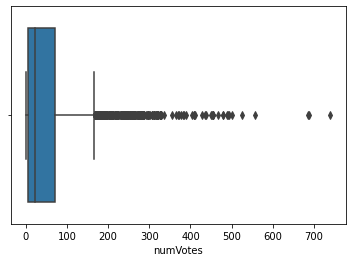

In [275]:
sns.boxplot(x = 'numVotes', data = df_churn_merge)

In [276]:
from scipy import stats
out_cols=['numVotes', 
       'vote_count', 'DateDiff_min', 'DateDiff_max',
       'DateDiff_median', 'likes_mean', 'likes_min', 'likes_max',
       'dislikes_mean', 'dislikes_min', 'dislikes_max',
       'commentDateDiff_min', 'commentDateDiff_max',
       'commentDateDiff_median', 'commentId_count']

In [277]:
for col in out_cols:
    z=np.abs(stats.zscore(df_churn_merge[col]))
    print(col, df_churn_merge[z>3].shape)

numVotes (89, 23)
vote_count (0, 23)
DateDiff_min (66, 23)
DateDiff_max (121, 23)
DateDiff_median (84, 23)
likes_mean (68, 23)
likes_min (96, 23)
likes_max (88, 23)
dislikes_mean (73, 23)
dislikes_min (42, 23)
dislikes_max (104, 23)
commentDateDiff_min (97, 23)
commentDateDiff_max (106, 23)
commentDateDiff_median (82, 23)
commentId_count (0, 23)


In [278]:
# removendo outliers da coluna numVotes para evitar que esses erros sejam inseridos em nosso modelo
z=np.abs(stats.zscore(df_churn_merge.numVotes))
df_churn_merge = df_churn_merge[z<3]

In [279]:
# substituindo os outliers pelos limites superiores e inferiores
['numVotes', 
       'vote_count', 'DateDiff_min', 'DateDiff_max',
       'DateDiff_median', 'likes_mean', 'likes_min', 'likes_max',
       'dislikes_mean', 'dislikes_min', 'dislikes_max',
       'commentDateDiff_min', 'commentDateDiff_max',
       'commentDateDiff_median', 'commentId_count']

for col in out_cols:
    lower_bound = df_churn_merge[col].mean()-3*df_churn_merge[col].std()
    upper_bound = df_churn_merge[col].mean()+3*df_churn_merge[col].std()
    df_churn_merge.loc[ df_churn_merge[col]<lower_bound, col] = int(lower_bound)
    df_churn_merge.loc[(df_churn_merge[col]>upper_bound), col] = int(upper_bound)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [280]:
df_churn_merge.describe(percentiles=[0.01,0.1,0.25,0.50,0.75,0.90,0.99])

employee     numVotes  stillExists    vote_mean    vote_mode  \
count  4064.000000  4064.000000  4064.000000  4064.000000  4064.000000   
mean    192.518455    45.002461     0.852608     2.949092     2.981053   
std     206.118146    55.493827     0.354540     0.596316     0.789037   
min       1.000000     0.000000     0.000000     1.000000     1.000000   
1%        2.000000     1.000000     0.000000     1.159813     1.000000   
10%      19.000000     2.000000     0.000000     2.142857     2.000000   
25%      51.000000     6.000000     1.000000     2.705882     3.000000   
50%     131.000000    20.000000     1.000000     3.000000     3.000000   
75%     244.000000    65.000000     1.000000     3.266667     3.000000   
90%     469.700000   133.000000     1.000000     3.750000     4.000000   
99%     926.110000   218.000000     1.000000     4.000000     4.000000   
max     999.000000   218.000000     1.000000     4.000000     4.000000   

          vote_min     vote_max   vote_count  DateDiff_min  DateDiff_max  ...  \
count  4064.000000  4064.000000  3683.000000   4064.000000   4064.000000  ...   
mean      1.859744     3.765748    49.501765      9.157972    148.462106  ...   
std       0.869260     0.485830    57.866440     17.706919    125.680774  ...   
min       1.000000     1.000000     1.000000      1.000000      1.000000  ...   
1%        1.000000     2.000000     1.000000      1.000000      1.000000  ...   
10%       1.000000     3.000000     3.000000      1.000000     13.000000  ...   
25%       1.000000     4.000000     8.000000      1.000000     45.000000  ...   
50%       2.000000     4.000000    23.000000      3.000000    130.000000  ...   
75%       2.000000     4.000000    71.000000      7.000000    207.000000  ...   
90%       3.000000     4.000000   141.000000     24.000000    300.000000  ...   
99%       4.000000     4.000000   229.000000    100.000000    563.000000  ...   
max       4.000000     4.000000   229.000000    100.000000    563.000000  ...   

        likes_mean    likes_min    likes_max  dislikes_mean  dislikes_min  \
count  4064.000000  4064.000000  4064.000000    4064.000000   4064.000000   
mean      6.621822     1.675689    13.477362       1.135128      0.103346   
std       4.231692     2.515155     9.533752       1.048029      0.458624   
min       0.000000     0.000000     0.000000       0.000000      0.000000   
1%        0.000000     0.000000     0.000000       0.000000      0.000000   
10%       1.500000     0.000000     3.000000       0.000000      0.000000   
25%       4.000000     0.000000     8.000000       0.333333      0.000000   
50%       6.771111     1.000000    12.000000       1.206733      0.000000   
75%       6.771111     1.000000    15.000000       1.206733      0.000000   
90%      12.177273     4.000000    27.000000       2.222222      0.000000   
99%      20.000000    12.000000    44.000000       5.000000      3.000000   
max      20.500000    12.000000    44.000000       5.600000      3.000000   

       dislikes_max  commentDateDiff_min  commentDateDiff_max  \
count   4064.000000          4064.000000          4064.000000   
mean       3.330217            33.290108           145.930856   
std        3.942949            46.409744            93.598221   
min        0.000000             1.000000             1.000000   
1%         0.000000             1.000000             3.000000   
10%        0.000000             3.000000            23.000000   
25%        1.000000            10.000000            97.750000   
50%        2.000000            17.000000           139.000000   
75%        3.000000            28.000000           165.000000   
90%        9.000000            93.000000           273.000000   
99%       17.000000           215.000000           468.000000   
max       17.000000           215.000000           468.000000   

       commentDateDiff_median  commentId_count  
count             4064.000000      2553.000000  
mean               102.120325        12.750881 

## 6) Salvando DataSets

In [281]:
df_churn_merge.to_csv('/content/drive/MyDrive/Colab Notebooks/Data_Wrangling/Case1/df_churn_merge.csv',sep=',',index=False)


In [282]:
dfClean = df_churn_merge
dfClean.head()

employee              companyAlias  numVotes lastParticipationDate  \
0       512  56aec740f1ef260003e307d6         4   2017-02-23 11:48:04   
1         2  56aec740f1ef260003e307d6        72   2017-03-17 00:00:00   
2       487  56aec740f1ef260003e307d6        14   2016-11-19 14:02:14   
3         3  56aec740f1ef260003e307d6        22   2017-02-16 00:00:00   
4         4  56aec740f1ef260003e307d6       195   2017-03-20 00:00:00   

   stillExists  vote_mean  vote_mode  vote_min  vote_max  vote_count  ...  \
0            1   2.000000        1.0       1.0       3.0         3.0  ...   
1            1   2.239437        1.0       1.0       4.0        71.0  ...   
2            0   3.181818        3.0       2.0       4.0        22.0  ...   
3            1   3.476190        4.0       2.0       4.0        21.0  ...   
4            1   3.860825        4.0       1.0       4.0       194.0  ...   

   likes_mean  likes_min  likes_max  dislikes_mean  dislikes_min  \
0    7.500000        6.0        9.0       1.000000           0.0   
1    5.428571        0.0       12.0       4.785714           0.0   
2    6.000000        6.0        6.0       0.000000           0.0   
3    3.333333        0.0       14.0       0.888889           0.0   
4    7.500000        1.0       29.0       1.000000           0.0   

   dislikes_max  commentDateDiff_min  commentDateDiff_max  \
0           2.0                  2.0                 30.0   
1          12.0                 43.0                399.0   
2           0.0                 22.0                 22.0   
3           4.0                  6.0                376.0   
4           4.0                 33.0                271.0   

   commentDateDiff_median  commentId_count  
0                    16.0              2.0  
1                   267.0             14.0  
2                    22.0              1.0  
3                   239.0              9.0  
4                   107.0             10.0  

[5 rows x 23 columns]

## 7) Enriquecendo os dados

### 7.1) Criando nova variável com Discretização

In [283]:
# calculando a razão entre like e dislike.

dfClean["rt_like_dislike"] = dfClean.likes_mean / dfClean.dislikes_mean
dfClean.shape

(4064, 24)

In [284]:
# substituindo os valores nulos provenientes dessa divisão por 1
# (logo estamos considerando likes e dislikes com a mesma quantidade)


dfClean.loc[dfClean["rt_like_dislike"].isna(), "rt_like_dislike"] = 1

In [285]:
# plotando histograma da nova variável com plotly.express
import plotly.express as px

fig = px.histogram(dfClean, x = 'rt_like_dislike')
fig.show()

In [286]:
# a distribuição da nova variável não possui um formato ideal,
# possuindo picos de valores indesejados e muitos outliers.
# Aplicando a discretização por EQUAL-FREQUENCY usando bins = 3

# A divisão das variáveis anteriores geraram alguns valores infinitos.
# Vamos substituir por um valor alto (50)

dfClean.loc[dfClean["rt_like_dislike"]== np.inf,"rt_like_dislike"] = 50 # reveja histograma


In [287]:
from sklearn.preprocessing import KBinsDiscretizer

# criar descritizador
discretizer = KBinsDiscretizer(n_bins = 3, encode='ordinal', strategy = 'quantile')

# aplicar o fit na coluna (array dos valores) para treinamento
discretizer.fit(dfClean[["rt_like_dislike"]].values)
                
# aplicar discretização
dfClean["rt_like_dislike"] = discretizer.transform(dfClean[["rt_like_dislike"]].values)
                

In [288]:
dfClean["rt_like_dislike"].value_counts()

1.0    1673
2.0    1358
0.0    1033
Name: rt_like_dislike, dtype: int64

In [289]:
fig = px.histogram(dfClean, x = 'rt_like_dislike')
fig.show()

# Nessa nova representação do histograma após a discretização em 3 bins, temos:
# 0 : menos like do que dislike
# 1 : mais ou menos equilibrado
# 2 : muita mais like do que dislike

### 7.2) Criando uma nova dimensão

Através do dataset dos comentários podemos calcular uma dimensão que indique se o autor daquele comentário chegou a sair da empresa ou não. Isso poderia indicar que um funcionário que dê like em algum comentário de alguém que saiu pode ser mais propenso a churn também.

In [290]:
# merge entre df_comments_anonimized e dfClean, com somente a variável 'stillExist'

dfComments = df_anonimized.merge(dfClean[['employee','companyAlias','stillExists']], on =['employee','companyAlias'])

In [291]:
dfComments.head()

employee              companyAlias                 commentId  \
0       307  56aec740f1ef260003e307d6  58d018d7e010990004e38070   
1       307  56aec740f1ef260003e307d6  58c913dfbd760e00043f1695   
2       307  56aec740f1ef260003e307d6  58c736e732f72a00046f5614   
3       307  56aec740f1ef260003e307d6  58c53f19307b1e0004ad41af   
4       307  56aec740f1ef260003e307d6  58c3ccf161ca670004c032fb   

                                                 txt  likes  dislikes  \
0  **********************************************...    4.0       0.0   
1  **********************************************...    8.0       1.0   
2                   ********************************    5.0       0.0   
3  **********************************************...    8.0       0.0   
4                             **********************    5.0       0.0   

          commentDate  stillExists  
0 2017-03-20 18:00:17            1  
1 2017-03-15 10:12:39            1  
2 2017-03-14 00:18:23            1  
3 2017-03-12 12:28:34            1  
4 2017-03-11 10:09:36            1

In [292]:
# merge entre a df_comment_interactions e essa nova base, trazendo somente a variável stillExists.

dfCommentsEmp = df_interactions.merge(dfComments[["commentId","stillExists"]], on=["commentId"])
dfCommentsEmp.head()

employee              companyAlias  liked  disliked  \
0       307  56aec740f1ef260003e307d6      1         0   
1        36  56aec740f1ef260003e307d6      1         0   
2       276  56aec740f1ef260003e307d6      1         0   
3        24  56aec740f1ef260003e307d6      1         0   
4       382  56aec740f1ef260003e307d6      1         0   

                  commentId  stillExists  
0  58d018d7e010990004e38070            1  
1  58d018d7e010990004e38070            1  
2  58d018d7e010990004e38070            1  
3  58d018d7e010990004e38070            1  
4  58d0179ae010990004e3806d            1

In [293]:
# calcular a média do stillExists para cada chave employee-company separando em liked e disliked

df_rate_liked_comments = pd.pivot_table(dfCommentsEmp, values='stillExists', index=['companyAlias', 'employee'],
                    columns=['liked','disliked'], aggfunc=np.mean, fill_value=0)
df_rate_liked_comments.head()

liked                                     0         1
disliked                                  1         0
companyAlias             employee                    
5370af43e4b0cff95558c12a 18        0.444444  0.589912
                         20        0.000000  0.375000
                         21        0.125000  0.595238
                         22        0.500000  0.333333
                         23        0.500000  0.500000

In [294]:
# renomeando e ajustando o nome das colunas
df_rate_liked_comments.columns = list(df_rate_liked_comments.columns.names)

In [295]:
df_rate_liked_comments = df_rate_liked_comments.reset_index().rename(columns={'liked':'mean_stillExists_liked_comments',
                                            'disliked':'mean_stillExists_disliked_comments'})

In [296]:
df_rate_liked_comments.head()

companyAlias  employee  mean_stillExists_liked_comments  \
0  5370af43e4b0cff95558c12a        18                         0.444444   
1  5370af43e4b0cff95558c12a        20                         0.000000   
2  5370af43e4b0cff95558c12a        21                         0.125000   
3  5370af43e4b0cff95558c12a        22                         0.500000   
4  5370af43e4b0cff95558c12a        23                         0.500000   

   mean_stillExists_disliked_comments  
0                            0.589912  
1                            0.375000  
2                            0.595238  
3                            0.333333  
4                            0.500000

In [297]:
# merge com o data set inicial

dfClean = dfClean.merge(df_rate_liked_comments, on=["employee","companyAlias"], how="left")
dfClean.head()

employee              companyAlias  numVotes lastParticipationDate  \
0       512  56aec740f1ef260003e307d6         4   2017-02-23 11:48:04   
1         2  56aec740f1ef260003e307d6        72   2017-03-17 00:00:00   
2       487  56aec740f1ef260003e307d6        14   2016-11-19 14:02:14   
3         3  56aec740f1ef260003e307d6        22   2017-02-16 00:00:00   
4         4  56aec740f1ef260003e307d6       195   2017-03-20 00:00:00   

   stillExists  vote_mean  vote_mode  vote_min  vote_max  vote_count  ...  \
0            1   2.000000        1.0       1.0       3.0         3.0  ...   
1            1   2.239437        1.0       1.0       4.0        71.0  ...   
2            0   3.181818        3.0       2.0       4.0        22.0  ...   
3            1   3.476190        4.0       2.0       4.0        21.0  ...   
4            1   3.860825        4.0       1.0       4.0       194.0  ...   

   dislikes_mean  dislikes_min  dislikes_max  commentDateDiff_min  \
0       1.000000           0.0           2.0                  2.0   
1       4.785714           0.0          12.0                 43.0   
2       0.000000           0.0           0.0                 22.0   
3       0.888889           0.0           4.0                  6.0   
4       1.000000           0.0           4.0                 33.0   

   commentDateDiff_max  commentDateDiff_median  commentId_count  \
0                 30.0                    16.0              2.0   
1                399.0                   267.0             14.0   
2                 22.0                    22.0              1.0   
3                376.0                   239.0              9.0   
4                271.0                   107.0             10.0   

   rt_like_dislike  mean_stillExists_liked_comments  \
0              2.0                              0.0   
1              0.0                              1.0   
2              2.0                              0.0   
3              0.0                              1.0   
4              2.0                              1.0   

   mean_stillExists_disliked_comments  
0                            1.000000  
1                            0.979167  
2                            1.000000  
3                            1.000000  
4                            0.983607  

[5 rows x 26 columns]

### 7.3) Tratamentos em uma única variável com Box-Cox

In [298]:
# Avaliar se as seguintes variáveis numéricas aparentam ser normais
bx_columns = ['numVotes','DateDiff_min','DateDiff_max', 'DateDiff_median']

In [299]:
dfClean[bx_columns].describe()

numVotes  DateDiff_min  DateDiff_max  DateDiff_median
count  4064.000000   4064.000000   4064.000000      4064.000000
mean     45.002461      9.157972    148.462106        83.165108
std      55.493827     17.706919    125.680774        70.916590
min       0.000000      1.000000      1.000000         1.000000
25%       6.000000      1.000000     45.000000        26.000000
50%      20.000000      3.000000    130.000000        72.500000
75%      65.000000      7.000000    207.000000       117.125000
max     218.000000    100.000000    563.000000       336.000000

In [300]:
import plotly.express as px

for col in bx_columns:
  fig = px.histogram(dfClean, x=col)
  fig.show()

In [301]:
# para evitar cálculos com 0
dfClean['numVotes_pos']=dfClean['numVotes']+1

In [302]:
# As variáveis estão com uma cauda muito longa na distribuição.
# Aplicando Box-Cox Transformation:

from sklearn.preprocessing import PowerTransformer

# Criar o objeto PowerTransformer com método box-cox para cada variável
bct_numVotes = PowerTransformer(method='box-cox', standardize=False)
bct_DateDiff_max = PowerTransformer(method='box-cox', standardize=False)
bct_DateDiff_median = PowerTransformer(method='box-cox', standardize=False)
bct_DateDiff_min = PowerTransformer(method='box-cox', standardize=False)

# aplicar transformação dos dados para cada variável
dfClean['numVotes_box-cox'] = bct_numVotes.fit_transform(dfClean[['numVotes_pos']])
dfClean['DateDiff_max_box-cox'] = bct_DateDiff_max.fit_transform(dfClean[['DateDiff_max']])
dfClean['DateDiff_median_box-cox'] = bct_DateDiff_median.fit_transform(dfClean[['DateDiff_median']])
dfClean['DateDiff_min_box-cox'] = bct_DateDiff_min.fit_transform(dfClean[['DateDiff_min']])

In [303]:
# já podemos dropar essa coluna:
dfClean =dfClean.drop('numVotes_pos',axis=1)

In [304]:
# visualizando novamente após transformação:

bx_columns = ['numVotes_box-cox','DateDiff_max_box-cox','DateDiff_median_box-cox','DateDiff_min_box-cox']

for col in bx_columns:
  fig = px.histogram(dfClean, x=col)
  fig.show()


# 8) Validação e Limpeza Final

In [306]:
# correlação entre variáveis com o target

for col in dfClean.select_dtypes(include=np.number).columns:
    print(col, dfClean[col].corr(dfClean['stillExists']))

employee -0.13061930593362
numVotes 0.08320733709590633
stillExists 1.0
vote_mean 0.03660244375244771
vote_mode 0.024327597708567218
vote_min -0.019976048116231295
vote_max 0.04955892091679806
vote_count 0.05339902329725833
DateDiff_min 0.01774534408085189
DateDiff_max 0.04458513068028731
DateDiff_median 0.07389656088690945
likes_mean -0.0046716420603596055
likes_min 0.08659450789337489
likes_max 0.023660705460176075
dislikes_mean -0.04865795353413212
dislikes_min 0.06342970972491727
dislikes_max 0.03957882960319471
commentDateDiff_min 0.07984348456655167
commentDateDiff_max -0.014643999691361547
commentDateDiff_median 0.011666737355124851
commentId_count -0.10049956679484556
rt_like_dislike 0.04631619592154073
mean_stillExists_liked_comments 0.0739605285694057
mean_stillExists_disliked_comments 0.3379784293482078
numVotes_box-cox 0.10891218116648907
DateDiff_max_box-cox 0.08378458353986956
DateDiff_median_box-cox 0.09927372374627454
DateDiff_min_box-cox 0.020158927048414783


In [307]:
# verificando novamente as distribuições e tipos de variáveis

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
dfClean.describe()

employee     numVotes  stillExists    vote_mean    vote_mode  \
count  4064.000000  4064.000000  4064.000000  4064.000000  4064.000000   
mean    192.518455    45.002461     0.852608     2.949092     2.981053   
std     206.118146    55.493827     0.354540     0.596316     0.789037   
min       1.000000     0.000000     0.000000     1.000000     1.000000   
25%      51.000000     6.000000     1.000000     2.705882     3.000000   
50%     131.000000    20.000000     1.000000     3.000000     3.000000   
75%     244.000000    65.000000     1.000000     3.266667     3.000000   
max     999.000000   218.000000     1.000000     4.000000     4.000000   

          vote_min     vote_max   vote_count  DateDiff_min  DateDiff_max  \
count  4064.000000  4064.000000  3683.000000   4064.000000   4064.000000   
mean      1.859744     3.765748    49.501765      9.157972    148.462106   
std       0.869260     0.485830    57.866440     17.706919    125.680774   
min       1.000000     1.000000     1.000000      1.000000      1.000000   
25%       1.000000     4.000000     8.000000      1.000000     45.000000   
50%       2.000000     4.000000    23.000000      3.000000    130.000000   
75%       2.000000     4.000000    71.000000      7.000000    207.000000   
max       4.000000     4.000000   229.000000    100.000000    563.000000   

       DateDiff_median   likes_mean    likes_min    likes_max  dislikes_mean  \
count      4064.000000  4064.000000  4064.000000  4064.000000    4064.000000   
mean         83.165108     6.621822     1.675689    13.477362       1.135128   
std          70.916590     4.231692     2.515155     9.533752       1.048029   
min           1.000000     0.000000     0.000000     0.000000       0.000000   
25%          26.000000     4.000000     0.000000     8.000000       0.333333   
50%          72.500000     6.771111     1.000000    12.000000       1.206733   
75%         117.125000     6.771111     1.000000    15.000000       1.206733   
max         336.000000    20.500000    12.000000    44.000000       5.600000   

       dislikes_min  dislikes_max  commentDateDiff_min  commentDateDiff_max  \
count   4064.000000   4064.000000          4064.000000          4064.000000   
mean       0.103346      3.330217            33.290108           145.930856   
std        0.458624      3.942949            46.409744            93.598221   
min        0.000000      0.000000             1.000000             1.000000   
25%        0.000000      1.000000            10.000000            97.750000   
50%        0.000000      2.000000            17.000000           139.000000   
75%        0.000000      3.000000            28.000000           165.000000   
max        3.000000     17.000000           215.000000           468.000000   

       commentDateDiff_median  commentId_count  rt_like_dislike  \
count             4064.000000      2553.000000      4064.000000   
mean               102.120325        12.750881         1.079970   
std                 70.456009        16.537759         0.762945   
min                  1.000000         1.000000         0.000000   
25%                 64.000000         2.000000         0.000000   
50%                 94.000000         6.000000         1.000000   
75%                116.125000        16.000000         2.000000   
max                351.000000        79.000000         2.000000   

       mean_stillExists_liked_comments  mean_stillExists_disliked_comments  \
count                      3007.000000                         3007.000000   
mean                          0.657053                            0.916686   
std                           0.445815                            0.197129   
min                           0.000000                            0.000000   
25%                           0.000000                            0.953718   
50%                           1.000000                            1.000000   
75%                           1.000000                            1.000000 

In [308]:
# tratando valores nuloes remanescentes:

mean_cols=['vote_count','mean_stillExists_liked_comments','mean_stillExists_disliked_comments']

for col in mean_cols:
    avg=dfClean[col].mean()
    dfClean.loc[dfClean[col].isna(),col]=avg
    print(col,"- substituição de nulos por",avg)

vote_count - substituição de nulos por 49.501764865598695
mean_stillExists_liked_comments - substituição de nulos por 0.6570527436627507
mean_stillExists_disliked_comments - substituição de nulos por 0.9166864577580643


In [309]:
dfClean.dtypes

employee                                       int64
companyAlias                                  object
numVotes                                       int64
lastParticipationDate                 datetime64[ns]
stillExists                                    int64
vote_mean                                    float64
vote_mode                                    float64
vote_min                                     float64
vote_max                                     float64
vote_count                                   float64
DateDiff_min                                 float64
DateDiff_max                                 float64
DateDiff_median                              float64
likes_mean                                   float64
likes_min                                    float64
likes_max                                    float64
dislikes_mean                                float64
dislikes_min                                 float64
dislikes_max                                 f

In [310]:
# definindo quais colunas manter
list(dfClean)

['employee',
 'companyAlias',
 'numVotes',
 'lastParticipationDate',
 'stillExists',
 'vote_mean',
 'vote_mode',
 'vote_min',
 'vote_max',
 'vote_count',
 'DateDiff_min',
 'DateDiff_max',
 'DateDiff_median',
 'likes_mean',
 'likes_min',
 'likes_max',
 'dislikes_mean',
 'dislikes_min',
 'dislikes_max',
 'commentDateDiff_min',
 'commentDateDiff_max',
 'commentDateDiff_median',
 'commentId_count',
 'rt_like_dislike',
 'mean_stillExists_liked_comments',
 'mean_stillExists_disliked_comments',
 'numVotes_box-cox',
 'DateDiff_max_box-cox',
 'DateDiff_median_box-cox',
 'DateDiff_min_box-cox']

In [312]:
dfFinal = dfClean[['employee',
 'companyAlias',
 #'numVotes',
 #'lastParticipationDate',# deslocar target para o final
 #'stillExists', # deslocar target para o final
 'vote_mean',
 'vote_mode',
 'vote_min',
 'vote_max',
 'vote_count',
 'DateDiff_min',
 #'DateDiff_max',
 #'DateDiff_median',
 'likes_mean',
 'likes_min',
 'likes_max',
 'dislikes_mean',
 'dislikes_min',
 'dislikes_max',
 #'commentDateDiff_min',
 'commentDateDiff_max',
 'commentDateDiff_median',
 'commentId_count',
 'rt_like_dislike',
 'mean_stillExists_liked_comments',
 'mean_stillExists_disliked_comments',
 'numVotes_box-cox',
 'DateDiff_max_box-cox',
 'DateDiff_median_box-cox',
 'DateDiff_min_box-cox',
 'lastParticipationDate',
 'stillExists']]


FIM

In [313]:
# salvando

dfFinal.to_csv('/content/drive/MyDrive/Colab Notebooks/Data_Wrangling/Case1//df_churn_final.csv',sep=',',index=False)
